<a href="https://colab.research.google.com/github/adithyabalakumar/EVA-4/blob/master/S8/s8(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S8/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/S8


# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [3]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


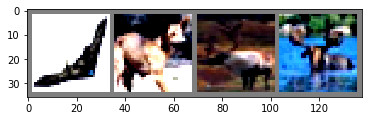

In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import model

# Model parameters

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = model.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [9]:
epochs = 30

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  scheduler.step()
  test.test(net, device, loader.testloader, criterion)

Epoch= 0 Loss=1.022437572479248 Batch_id=781 Accuracy=49.08: 100%|██████████| 782/782 [01:08<00:00, 11.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0169, Accuracy: 6110/10000 (61.10%)



Epoch= 1 Loss=1.370828628540039 Batch_id=781 Accuracy=68.26: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 6942/10000 (69.42%)



Epoch= 2 Loss=0.6044334173202515 Batch_id=781 Accuracy=76.44: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0111, Accuracy: 7507/10000 (75.07%)



Epoch= 3 Loss=0.5874382853507996 Batch_id=781 Accuracy=81.19: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0105, Accuracy: 7680/10000 (76.80%)



Epoch= 4 Loss=0.630358874797821 Batch_id=781 Accuracy=84.51: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0112, Accuracy: 7605/10000 (76.05%)



Epoch= 5 Loss=0.4551457464694977 Batch_id=781 Accuracy=87.39: 100%|██████████| 782/782 [01:09<00:00, 11.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0096, Accuracy: 7920/10000 (79.20%)



Epoch= 6 Loss=0.2840622067451477 Batch_id=781 Accuracy=93.31: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8319/10000 (83.19%)



Epoch= 7 Loss=0.436479777097702 Batch_id=781 Accuracy=95.04: 100%|██████████| 782/782 [01:09<00:00, 11.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 8376/10000 (83.76%)



Epoch= 8 Loss=0.3061569631099701 Batch_id=781 Accuracy=96.24: 100%|██████████| 782/782 [01:09<00:00, 11.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 8364/10000 (83.64%)



Epoch= 9 Loss=0.050097912549972534 Batch_id=781 Accuracy=97.27: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 8351/10000 (83.51%)



Epoch= 10 Loss=0.040545523166656494 Batch_id=781 Accuracy=97.87: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0085, Accuracy: 8313/10000 (83.13%)



Epoch= 11 Loss=0.15325988829135895 Batch_id=781 Accuracy=98.50: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0084, Accuracy: 8328/10000 (83.28%)



Epoch= 12 Loss=0.17436064779758453 Batch_id=781 Accuracy=99.14: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0083, Accuracy: 8370/10000 (83.70%)



Epoch= 13 Loss=0.06733056902885437 Batch_id=781 Accuracy=99.31: 100%|██████████| 782/782 [01:09<00:00, 11.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0084, Accuracy: 8366/10000 (83.66%)



Epoch= 14 Loss=0.014221251010894775 Batch_id=781 Accuracy=99.41: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0084, Accuracy: 8364/10000 (83.64%)



Epoch= 15 Loss=0.07190552353858948 Batch_id=781 Accuracy=99.48: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0085, Accuracy: 8373/10000 (83.73%)



Epoch= 16 Loss=0.07453054189682007 Batch_id=781 Accuracy=99.53: 100%|██████████| 782/782 [01:09<00:00, 11.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8354/10000 (83.54%)



Epoch= 17 Loss=0.13544021546840668 Batch_id=781 Accuracy=99.57: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8353/10000 (83.53%)



Epoch= 18 Loss=0.1763722002506256 Batch_id=781 Accuracy=99.65: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8354/10000 (83.54%)



Epoch= 19 Loss=0.05975419282913208 Batch_id=781 Accuracy=99.71: 100%|██████████| 782/782 [01:09<00:00, 11.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8381/10000 (83.81%)



Epoch= 20 Loss=0.24819865822792053 Batch_id=781 Accuracy=99.69: 100%|██████████| 782/782 [01:09<00:00, 12.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8363/10000 (83.63%)



Epoch= 21 Loss=0.1311555802822113 Batch_id=781 Accuracy=99.64: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8361/10000 (83.61%)



Epoch= 22 Loss=0.13009992241859436 Batch_id=781 Accuracy=99.72: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 8363/10000 (83.63%)



Epoch= 23 Loss=0.06208080053329468 Batch_id=781 Accuracy=99.69: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 8342/10000 (83.42%)



Epoch= 24 Loss=0.02323254942893982 Batch_id=781 Accuracy=99.72: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8379/10000 (83.79%)



Epoch= 25 Loss=0.008919060230255127 Batch_id=781 Accuracy=99.74: 100%|██████████| 782/782 [01:10<00:00, 11.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8376/10000 (83.76%)



Epoch= 26 Loss=0.06844088435173035 Batch_id=781 Accuracy=99.69: 100%|██████████| 782/782 [01:09<00:00, 11.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 8365/10000 (83.65%)



Epoch= 27 Loss=0.10013048350811005 Batch_id=781 Accuracy=99.77: 100%|██████████| 782/782 [01:09<00:00, 11.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 8364/10000 (83.64%)



Epoch= 28 Loss=0.09566065669059753 Batch_id=781 Accuracy=99.77: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 8346/10000 (83.46%)



Epoch= 29 Loss=0.326831191778183 Batch_id=781 Accuracy=99.68: 100%|██████████| 782/782 [01:09<00:00, 12.75it/s]



Validation set: Average loss: 0.0086, Accuracy: 8356/10000 (83.56%)



# Result visualization

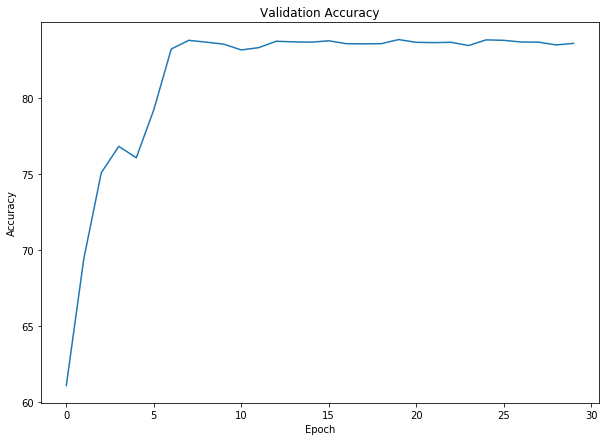

In [10]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_accuracy_change_plot.jpg')

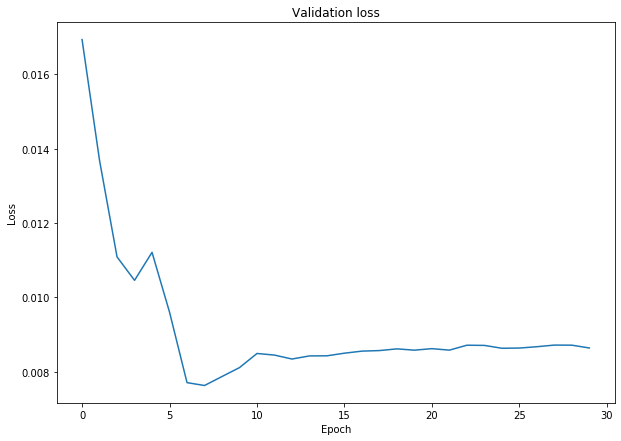

In [11]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))

axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_loss_change_plot.jpg')

In [0]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [0]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))